In [1]:
#Importation des bibliotheques necessaires

import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

In [2]:
#Les categories des images 
Categories=['car','ship']



flat_data_arr=[]
target_arr=[]

#Chemin de la BD
datadir='./DB'

#Parcourir les categories
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  #PreTraitement sur chaque image et les stocker dans le tableau "flat_data_arr"
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')

#Affectation "image : etiquette categorie" dans le dataframe "df"
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : car
loaded category:car successfully
loading... category : ship
loaded category:ship successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.237869,0.182967,0.077085,0.229791,0.174889,0.069007,0.282092,0.227190,0.121307,0.351686,...,0.198170,0.186405,0.221699,0.144954,0.133190,0.168484,0.189895,0.178131,0.213425,0
1,0.658431,0.399608,0.203529,0.656078,0.397255,0.201176,0.651438,0.392614,0.196536,0.646797,...,0.394967,0.386536,0.343399,0.373974,0.368209,0.330824,0.389895,0.390641,0.350902,0
2,0.019608,0.105882,0.098039,0.019608,0.105882,0.098039,0.019608,0.105882,0.098039,0.019608,...,0.467908,0.427778,0.254314,0.412183,0.366039,0.198588,0.459556,0.413412,0.245961,0
3,0.219647,0.117686,0.058863,0.221451,0.119490,0.060667,0.224314,0.122353,0.063529,0.227451,...,0.078301,0.022484,0.020980,0.072810,0.020261,0.020261,0.065752,0.017908,0.017908,0
4,0.879346,0.883268,0.647974,0.879346,0.883268,0.647974,0.877386,0.881307,0.646013,0.875425,...,0.330327,0.259739,0.251895,0.330327,0.259739,0.251895,0.330327,0.259739,0.251895,0
5,0.387294,0.319072,0.096444,0.413020,0.346444,0.122170,0.427843,0.362680,0.133072,0.426314,...,0.077386,0.061699,0.049935,0.074248,0.058562,0.046797,0.071895,0.056209,0.044444,0
6,0.260078,0.292366,0.090536,0.249569,0.281856,0.080026,0.237516,0.271307,0.066471,0.230719,...,0.187908,0.297712,0.140850,0.189686,0.299490,0.142627,0.190235,0.300039,0.143176,0
7,0.247150,0.168719,0.305974,0.247699,0.169268,0.306523,0.247974,0.169542,0.306797,0.249150,...,0.477843,0.429216,0.218105,0.476340,0.426444,0.221699,0.452810,0.402209,0.200523,0
8,0.442131,0.419778,0.405007,0.432954,0.410601,0.395830,0.423268,0.400915,0.386144,0.421503,...,0.099608,0.080000,0.056471,0.123739,0.104131,0.080601,0.128601,0.108993,0.085464,0
9,0.489085,0.372222,0.328693,0.468301,0.356144,0.310261,0.467124,0.357320,0.310261,0.471281,...,0.161699,0.173464,0.200915,0.161699,0.173464,0.200915,0.161699,0.173464,0.200915,0


In [3]:
#inputs
x=df.iloc[:,:-1]
#outputs
y=df.iloc[:,-1]

#division des donnees en 2 parties : donnees d'apprentissage et de test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [4]:
#Apprentissage et construction de model

param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
#svc : support vector classifier
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
#Parcourir les hyperparametres de "SVC" et selectionner les meilleurs parametres pour notre model avec "GridSearchCV"
model=GridSearchCV(svc,param_grid)
print("....")
model.fit(x_train,y_train)
print("The Model is trained well with the given images")
#Les meilleurs parametres
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
....
The Model is trained well with the given images


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [8]:
#Prediction de nos donnees test
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [9]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [11]:
#pourcentage de precision
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The model is 100.0% accurate


In [13]:
#Enregistrer le model dans le disque
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


Enter URL of Image./DB/car/29032.jpg


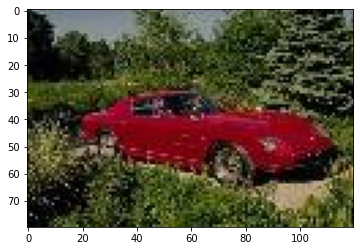

car = 97.18362426082743%
ship = 2.816375739172571%
The predicted image is : car


In [15]:
#Test du model

model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])